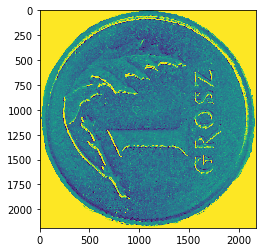

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR ="C:/Users/Kornel/Documents/TensorFlow/PLN"
CATEGORIES = ["1gr", "1zl", "2gr","2zl", "5gr", "5zl", "10gr", "20gr", "50gr"]


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array)  # graph it
        #plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

        break  # we just want one for now so break
    break  #...and one more!

TypeError: Image data of dtype object cannot be converted to float

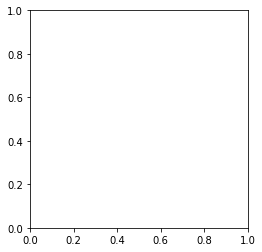

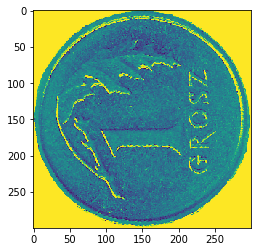

In [4]:
IMG_SIZE = 300

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [6]:
print(len(training_data))

678


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

8
0
8
1
8
3
5
7
6
5


In [10]:
Xfeatures = []
Ylabels = []
#newXfeatures = []

In [11]:
for features, label in training_data:
    Xfeatures.append(features)
    Ylabels.append(label)
    
#for i in range(0,len(Xfeatures),3):
#    av = (Xfeatures[i] + Xfeatures[i+1] + Xfeatures[i + 2]) / 3 
#    newXfeatures.append(av)
    
Xfeatures = np.array(Xfeatures).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#newXfeatures = np.array(newXfeatures).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
import pickle 

pickle_out = open("Xfeatures.pickle", "wb")
pickle.dump(Xfeatures, pickle_out)
pickle_out.close()

pickle_out = open("Ylabels.pickle", "wb")
pickle.dump(Ylabels, pickle_out)
pickle_out.close()


print(len(Xfeatures))
#print(len(newXfeatures))
print(len(Ylabels))

678
678


In [13]:
pickle_in = open("Xfeatures.pickle", "rb")
Xfeatures2 = pickle.load(pickle_in)


In [14]:
Xfeatures2[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)